## Reto: Los deportistas mejor pagados

In [341]:
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
import numpy as np

In [342]:
deportistas_df = pd.read_csv('forbes_richest_atheletes.csv')
deportistas_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [343]:
deportistas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [344]:
#Limpiando los nombres de los deportes

deportistas_df['Sport'] = deportistas_df['Sport'].str.lower()
deportistas_df.loc[deportistas_df["Sport"] == "nba", "Sport"] = "basketball"
deportistas_df.loc[deportistas_df["Sport"] == "nfl", "Sport"] = "american Football / baseball"
deportistas_df.loc[deportistas_df["Sport"] == "f1 racing", "Sport"] = "auto racing"
deportistas_df.loc[deportistas_df["Sport"] == "nascar", "Sport"] = "auto racing"
deportistas_df.loc[deportistas_df["Sport"] == "auto Racing (nascar)", "Sport"] = "auto racing"
deportistas_df.loc[deportistas_df["Sport"] == "f1 motorsports", "Sport"] = "motorcycle gp"

deportistas_df.loc[deportistas_df["Name"] == "Aaron Rogers", "Name"] = "Aaron Rodgers"

deportistas_df.head(50)


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


### Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [345]:
deportistas_copy1 = deportistas_df.copy()
deportistas_copy1 = deportistas_copy1.loc[deportistas_copy1["Year"] >= 2010]
deportistas_copy1 = deportistas_copy1.sort_values(['Year','Name'], ascending=[True,True])

deportistas_copy1_max = deportistas_copy1.groupby('Name').nth(-1)
deportistas_copy1_max['Current Rank MAX'] = deportistas_copy1_max['Current Rank']
deportistas_copy1_max

,S.NO,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Current Rank MAX
Name,,,,,,,,
Aaron Rodgers,288,USA,7,??,american football,2019,89.3,7
Alex Rodriguez,209,Dominican,8,12,baseball,2011,35.0,8
Andrew Luck,267,USA,6,NaN,american football,2017,50.0,6
Cam Newton,258,USA,7,>20,american football,2016,53.1,7
Canelo Alvarez,285,Mexico,4,15,boxing,2019,94.0,4
Carson Wentz,301,USA,10,>100,american football,2020,59.1,10
Conor McGregor,275,Ireland,4,24,mma,2018,99.0,4
Cristiano Ronaldo,293,Portugal,2,2,soccer,2020,105.0,2
David Beckham,229,UK,8,8,soccer,2013,47.2,8


In [346]:
deportistas_copy1_min = deportistas_copy1.groupby('Name').nth(0)
deportistas_copy1_min['Current Rank MIN'] = deportistas_copy1_min['Current Rank']
deportistas_copy1_min

,S.NO,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Current Rank MIN
Name,,,,,,,,
Aaron Rodgers,227,USA,6,?,american football,2013,49.0,6
Alex Rodriguez,209,Dominican,8,12,baseball,2011,35.0,8
Andrew Luck,267,USA,6,NaN,american football,2017,50.0,6
Cam Newton,258,USA,7,>20,american football,2016,53.1,7
Canelo Alvarez,285,Mexico,4,15,boxing,2019,94.0,4
Carson Wentz,301,USA,10,>100,american football,2020,59.1,10
Conor McGregor,275,Ireland,4,24,mma,2018,99.0,4
Cristiano Ronaldo,208,Portugal,7,13,soccer,2011,38.0,7
David Beckham,196,UK,5,5,soccer,2010,43.7,5


In [360]:
deportistas_min_max = pd.merge(deportistas_copy1_min, deportistas_copy1_max, how='inner', on='Name')
deportistas_min_max2 = deportistas_min_max.drop(['S.NO_x','Nationality_x','Current Rank_x','Previous Year Rank_x','Sport_x','Year_x','earnings ($ million)_x','S.NO_y','Nationality_y','Current Rank_y','Previous Year Rank_y','Sport_y','Year_y','earnings ($ million)_y'], axis=1) 
deportistas_min_max2['rank_pos_difference'] = deportistas_min_max2['Current Rank MAX'] - deportistas_min_max2['Current Rank MIN']
deportistas_min_max2 = deportistas_min_max2.loc[deportistas_min_max2['rank_pos_difference'] <= -2]
deportistas_min_max2['rank_pos_difference'] = abs(deportistas_min_max2['rank_pos_difference'])
deportistas_min_max2
#Lista de atletas que subieron 2 o mas posisiones entre 2010 y 2020

,Current Rank MIN,Current Rank MAX,rank_pos_difference
Name,,,
Cristiano Ronaldo,7,2,5
LeBron James,7,5,2
Lionel Messi,10,3,7
Manny Pacquiao,8,2,6
Roger Federer,6,1,5
Stephen Curry,8,6,2


### Atleta con el menor número de apariciones y mayores ganancias.

In [ ]:
deportistas_copy = deportistas_df.copy()

In [ ]:
deportistas_copy2= deportistas_copy.groupby(['Name']).size().reset_index(name= 'Appearances')
deportistas_copy2 = deportistas_copy2.sort_values('Appearances')
deportistas_copy2

,Name,Appearances
20,Drew Brees,1
21,Eli Manning,1
22,Emmit Smith,1
25,Gary Sheffield,1
60,Novak Djokovic,1
...,...,...
53,Michael Schumacher,13
44,LeBron James,13
42,Kobe Bryant,14
51,Michael Jordan,19


In [ ]:
deportistas_copy2_2= deportistas_copy.groupby(['Name'])['earnings ($ million)'].agg('sum').reset_index(name= 'Total_million')
deportistas_copy2_2 = deportistas_copy2_2.sort_values('Total_million', ascending= False)
deportistas_copy2_2

,Name,Total_million
77,Tiger Woods,1373.8
44,LeBron James,844.8
24,Floyd Mayweather,840.0
13,Cristiano Ronaldo,787.1
67,Roger Federer,781.1
...,...,...
11,Cecil Fielder,12.7
52,Michael Moorer,12.1
19,"Donovan ""Razor"" Ruddock",10.2
56,Monica Seles,8.5


In [ ]:
deportistas_copy2_3 = pd.merge(deportistas_copy2, deportistas_copy2_2, how= 'inner', on= 'Name').sort_values('Total_million', ascending=False)
deportistas_copy2_3

,Name,Appearances,Total_million
80,Tiger Woods,19,1373.8
77,LeBron James,13,844.8
63,Floyd Mayweather,5,840.0
73,Cristiano Ronaldo,10,787.1
75,Roger Federer,12,781.1
...,...,...,...
31,Cecil Fielder,1,12.7
12,Michael Moorer,1,12.1
18,"Donovan ""Razor"" Ruddock",1,10.2
7,Greg Norman,1,8.5


In [ ]:
deportistas_copy2_3['Razon']= (deportistas_copy2_3['Total_million']) / (deportistas_copy2_3['Appearances'])
deportistas_copy2_3

,Name,Appearances,Total_million,Razon
80,Tiger Woods,19,1373.8,72.305263
77,LeBron James,13,844.8,64.984615
63,Floyd Mayweather,5,840.0,168.000000
73,Cristiano Ronaldo,10,787.1,78.710000
75,Roger Federer,12,781.1,65.091667
...,...,...,...,...
31,Cecil Fielder,1,12.7,12.700000
12,Michael Moorer,1,12.1,12.100000
18,"Donovan ""Razor"" Ruddock",1,10.2,10.200000
7,Greg Norman,1,8.5,8.500000


In [ ]:
#Buscando la cantidad maxima de ganancias
deportistas_copy2_3['Razon'].max()

168.0

In [ ]:
deportistas_copy2_3[deportistas_copy2_3['Razon'] == 168.0]

,Name,Appearances,Total_million,Razon
63,Floyd Mayweather,5,840.0,168.0


### Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

### País con mayor número de deportes con atletas en el dataset.

In [ ]:

df_by_sport = deportistas_df[['Nationality','Sport', 'Name']].copy()
df_by_sport['Sport'] = df_by_sport['Sport'].str.lower()
#Eliminando nombres de atletas duplicados para despues dejar en el dataframe los paises con deportes unicos
df_by_sport = df_by_sport.drop_duplicates(subset=['Name'])
df_by_sport = df_by_sport.drop_duplicates(subset=['Sport','Nationality'])
df_by_sport = df_by_sport.drop('Name',1)
df_by_sport

C:\Users\rodol\AppData\Local\Temp\ipykernel_2092\480574622.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_by_sport = df_by_sport.drop('Name',1)


,Nationality,Sport
0,USA,boxing
3,Brazil,auto racing
4,France,auto racing
5,USA,golf
6,Australia,golf
7,USA,basketball
16,Canada,boxing
18,UK,auto racing
25,USA,tennis
26,USA,american football / baseball


In [ ]:
#Agrupando por nacionalidad
df_by_sport.groupby(['Nationality'])['Nationality'].count().reset_index(name="NumSports")



,Nationality,NumSports
0,Argentina,1
1,Australia,1
2,Austria,1
3,Brazil,2
4,Canada,4
5,Finland,1
6,France,1
7,Germany,1
8,Ireland,1
9,Italy,1


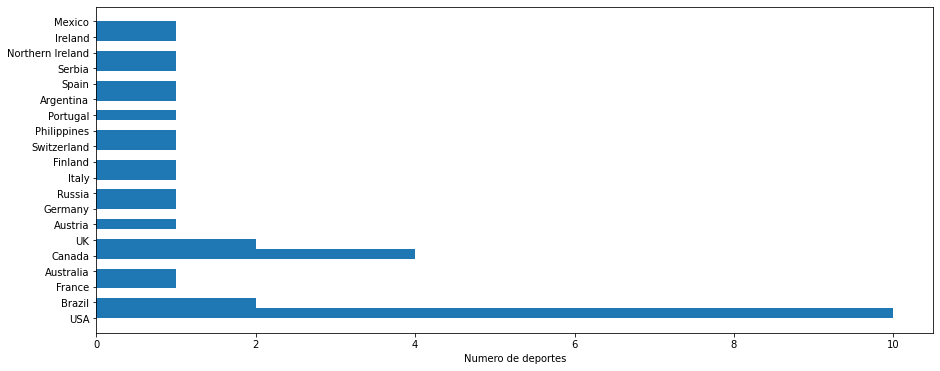

In [ ]:
f, axes = plt.subplots(figsize=(15,6))
plt.hist(df_by_sport['Nationality'], bins=30, orientation='horizontal')
plt.xlabel('Numero de deportes')
plt.show()

#### El pais con mayor numero de atletas es: USA

### ¿Cuántos atletas por deporte tiene cada país?

In [ ]:
deportistas_copy5= deportistas_copy.groupby(['Name','Sport','Nationality']).size().reset_index(name= 'Count')
deportistas_copy5

,Name,Sport,Nationality,Count
0,Aaron Rodgers,american football,USA,2
1,Alain Prost,auto racing,France,3
2,Alex Rodriguez,baseball,Dominican,1
3,Alex Rodriguez,baseball,USA,3
4,Andre Agassi,tennis,USA,6
...,...,...,...,...
81,Terrell Suggs,american football,USA,1
82,Tiger Woods,golf,USA,19
83,Tom Brady,american football,USA,1
84,Valentino Rossi,motorcycle gp,Italy,4


In [ ]:
deportistas_copy5= deportistas_copy5.groupby(['Nationality','Sport'])['Name'].agg('count').reset_index(name= 'Players')
deportistas_copy5= deportistas_copy5.sort_values('Nationality')
deportistas_copy5

,Nationality,Sport,Players
0,Argentina,soccer,1
1,Australia,golf,1
2,Austria,auto racing,1
3,Brazil,auto racing,1
4,Brazil,soccer,2
7,Canada,hockey,1
8,Canada,ice hockey,1
5,Canada,auto racing,1
6,Canada,boxing,1
9,Dominican,baseball,1


### Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [ ]:
deportistas_copy6 = deportistas_copy.drop(['S.NO','Name','Current Rank','Previous Year Rank','Year','Nationality'], axis=1) 
deportistas_copy6_2 = deportistas_copy6.groupby(['Sport'])['earnings ($ million)'].agg('sum').reset_index(name= 'Ganancia_total(M)')
deportistas_copy6_2



,Sport,Ganancia_total(M)
0,american Football / baseball,37.5
1,american football,901.2
2,american football / baseball,22.5
3,auto racing,860.5
4,auto racing (nascar),44.5
5,baseball,146.1
6,basketball,3433.3
7,boxing,2298.8
8,cycling,28.0
9,golf,2136.5


In [ ]:
deportistas_copy6_2['Ganancia_total(M)'].min()

17.9

In [ ]:
# Ganancia mínima por deporte
deportistas_copy6_2[deportistas_copy6_2['Ganancia_total(M)'] == 17.9]

,Sport,Ganancia_total(M)
10,hockey,17.9


In [ ]:
deportistas_copy6_2['Ganancia_total(M)'].max()

3433.3

In [ ]:
# Ganancia máxima por deporte
deportistas_copy6_2[deportistas_copy6_2['Ganancia_total(M)'] == 3433.3]

,Sport,Ganancia_total(M)
6,basketball,3433.3


In [ ]:
deportistas_copy6 = deportistas_copy.drop(['S.NO','Name','Current Rank','Previous Year Rank','Year','Sport'], axis=1) 
deportistas_copy6_3 = deportistas_copy6.groupby(['Nationality'])['earnings ($ million)'].agg('sum').reset_index(name= 'Ganancia_total(M)')
deportistas_copy6_3

,Nationality,Ganancia_total(M)
0,Argentina,715.5
1,Australia,8.5
2,Austria,13.5
3,Brazil,422.0
4,Canada,99.1
5,Dominican,35.0
6,Filipino,62.0
7,Finland,129.0
8,France,36.0
9,Germany,639.0


In [ ]:
deportistas_copy6_3['Ganancia_total(M)'].min()

8.5

In [ ]:
# Ganancia mínima por país
deportistas_copy6_3[deportistas_copy6_3['Ganancia_total(M)'] == 8.5]

,Nationality,Ganancia_total(M)
1,Australia,8.5


In [ ]:
deportistas_copy6_3['Ganancia_total(M)'].max()

8786.3

In [ ]:
# Ganancia máxima por país
deportistas_copy6_3[deportistas_copy6_3['Ganancia_total(M)'] == 8786.3]

,Nationality,Ganancia_total(M)
21,USA,8786.3


### Atleta con mayores ganancias por deporte por década

In [361]:
deportistas_copy7 = deportistas_copy.drop(['S.NO','Nationality','Current Rank','Previous Year Rank'], axis=1)
deportistas_copy7 

,Name,Sport,Year,earnings ($ million)
0,Mike Tyson,boxing,1990,28.6
1,Buster Douglas,boxing,1990,26.0
2,Sugar Ray Leonard,boxing,1990,13.0
3,Ayrton Senna,auto racing,1990,10.0
4,Alain Prost,auto racing,1990,9.0
...,...,...,...,...
296,Stephen Curry,basketball,2020,74.4
297,Kevin Durant,basketball,2020,63.9
298,Tiger Woods,golf,2020,62.3
299,Kirk Cousins,american football,2020,60.5


## Década 1990-2000

In [362]:
deportistas_copy7_2 = deportistas_copy7[deportistas_copy7.Year.between(1990,2000)]
deportistas_copy7_2

,Name,Sport,Year,earnings ($ million)
0,Mike Tyson,boxing,1990,28.6
1,Buster Douglas,boxing,1990,26.0
2,Sugar Ray Leonard,boxing,1990,13.0
3,Ayrton Senna,auto racing,1990,10.0
4,Alain Prost,auto racing,1990,9.0
...,...,...,...,...
105,Dale Earnhardt,auto racing (nascar),2000,24.5
106,Shaq O'Neal,basketball,2000,24.0
107,Lennox Lewis,boxing,2000,23.0
108,Oscar De La Hoya,boxing,2000,23.0


In [363]:
deportistas_copy7_2 = deportistas_copy7_2.groupby(['Name','Sport'])['earnings ($ million)'].agg('sum').reset_index(name='Ganancias 1990-2000')
deportistas_copy7_2 = deportistas_copy7_2.sort_values('Ganancias 1990-2000', ascending=False)
deportistas_copy7_2.head(1)

,Name,Sport,Ganancias 1990-2000
24,Michael Jordan,basketball,446.8


## Década 2001-2010

In [364]:
deportistas_copy7_3 = deportistas_copy7[deportistas_copy7.Year.between(2001,2010)]
deportistas_copy7_3

,Name,Sport,Year,earnings ($ million)
110,Tiger Woods,golf,2002,69.0
111,Michael Schumacher,motorcycle gp,2002,67.0
112,Michael Jordan,basketball,2002,36.0
113,Lennox Lewis,boxing,2002,28.0
114,Grant Hill,basketball,2002,24.0
...,...,...,...,...
196,Roger Federer,tennis,2010,43.0
197,LeBron James,basketball,2010,42.8
198,Manny Pacquiao,boxing,2010,42.0
199,Eli Manning,american football,2010,39.9


In [365]:
deportistas_copy7_3 = deportistas_copy7_3.groupby(['Name','Sport'])['earnings ($ million)'].agg('sum').reset_index(name='Ganancias 2001-2010')
deportistas_copy7_3 = deportistas_copy7_3.sort_values('Ganancias 2001-2010', ascending=False)
deportistas_copy7_3.head(1)

,Name,Sport,Ganancias 2001-2010
30,Tiger Woods,golf,834.3


## Década 2011-2020

In [366]:
deportistas_copy7_4 = deportistas_copy7[deportistas_copy7.Year.between(2011,2020)]
deportistas_copy7_4

,Name,Sport,Year,earnings ($ million)
201,Tiger Woods,golf,2011,75.0
202,Kobe Bryant,basketball,2011,53.0
203,LeBron James,basketball,2011,48.0
204,Roger Federer,tennis,2011,47.0
205,Phil Mickelson,golf,2011,46.5
...,...,...,...,...
296,Stephen Curry,basketball,2020,74.4
297,Kevin Durant,basketball,2020,63.9
298,Tiger Woods,golf,2020,62.3
299,Kirk Cousins,american football,2020,60.5


In [367]:
deportistas_copy7_4 = deportistas_copy7_4.groupby(['Name','Sport'])['earnings ($ million)'].agg('sum').reset_index(name='Ganancias 2011-2020')
deportistas_copy7_4 = deportistas_copy7_4.sort_values('Ganancias 2011-2020', ascending=False)
deportistas_copy7_4.head(1)

,Name,Sport,Ganancias 2011-2020
7,Cristiano Ronaldo,soccer,787.1


### Ganancia total por cada deporte por cada año.

In [ ]:
df_earnings = deportistas_df[['Sport','Year', 'earnings ($ million)']].copy()
df_earnings['Sport'] = df_earnings['Sport'].str.lower()
df_earnings = df_earnings.rename(columns = {'earnings ($ million)':'earnings'})
df_earnings = df_earnings.groupby(['Sport','Year'])['earnings'].sum().reset_index()
df_earnings

,Sport,Year,earnings
0,american football,2004,42.0
1,american football,2005,37.5
2,american football,2006,29.0
3,american football,2010,78.2
4,american football,2012,42.4
...,...,...,...
169,tennis,2016,123.6
170,tennis,2017,64.0
171,tennis,2018,77.2
172,tennis,2019,93.4
